# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import numpy as np
from sklearn.datasets import make_classification

def euclidean_dist(data1, data2):
    '''
    Given data1 and data2, compute Euclidean distance
    '''
    data1 = np.array(data1)
    data2 = np.array(data2)
    squared_diff = (data1 - data2) ** 2
    return np.sqrt(np.sum(squared_diff))
def manhattan(data1, data2):
    '''
    Given data1 and data2, compute Manhattan distance
    '''
    # Convert inputs to numpy arrays
    data1 = np.array(data1)
    data2 = np.array(data2)
    abs_diff = np.abs(data1 - data2)
    return np.sum(abs_diff)
X_train, y_train = make_classification(
    n_samples=50,      
    n_features=2,     
    n_informative=2,   
    n_redundant=0,    
    n_classes=2,       
    random_state=42   
)
X_test = np.array([[0.5, 0.5]])  
k = 6  
distances = []
for i in range(len(X_train)):
    dist = euclidean_dist(X_test[0], X_train[i])
    distances.append((dist, y_train[i]))
distances.sort(key=lambda x: x[0])
k_nearest = distances[:k]
print("K Nearest Neighbors:")
for dist, label in k_nearest:
    print(f"Distance: {dist:.4f}, Label: {label}")
predictions = [label for _, label in k_nearest]
predicted_class = max(set(predictions), key=predictions.count)
print(f"\nPredicted class for X_test: {predicted_class}")

# 1. Euclidean Distance Function:
# Takes two data points as input and computes their Euclidean distance
# Uses numpy for efficient array operations
# Applies the formula: sqrt(sum((x1-x2)^2))

# 2. Manhattan Distance Function:
# Takes two data points and computes Manhattan distance
# Uses absolute differences between corresponding elements
# Applies the formula: sum(|x1-x2|)

# 3. Training Data Generation:
# Uses sklearn's make_classification to create synthetic data
# Creates 50 samples with 2 features for binary classification
# n_informative=2 means both features contribute to classification

# 4. Test Data Processing:
# Creates a single test point at (0.5, 0.5)
# Calculates distances to all training points
# Stores both distance and corresponding label
# Sorts by distance to find k nearest neighbors
# Uses majority voting to predict the class

K Nearest Neighbors:
Distance: 0.3675, Label: 1
Distance: 0.3918, Label: 1
Distance: 0.4107, Label: 1
Distance: 0.4321, Label: 1
Distance: 0.4436, Label: 1
Distance: 0.6036, Label: 0

Predicted class for X_test: 1


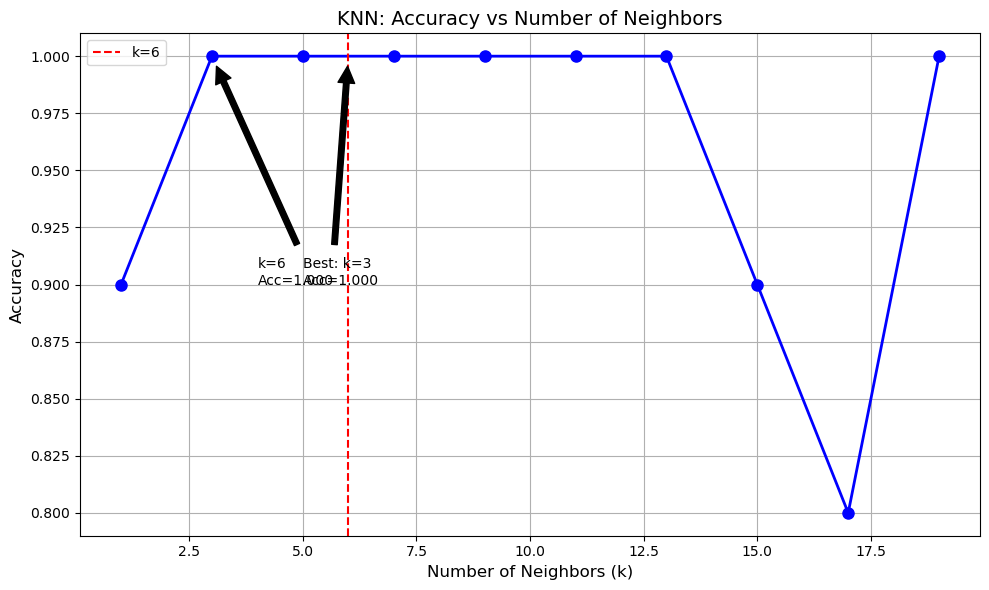

In [2]:
#Show a plot of accuracy vs number of neighbors

import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def euclidean_dist(data1, data2):
    data1, data2 = np.array(data1), np.array(data2)
    return np.sqrt(np.sum((data1 - data2) ** 2))
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = []
        for i in range(len(X_train)):
            dist = euclidean_dist(test_point, X_train[i])
            distances.append((dist, y_train[i]))
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:k]
        labels = [label for _, label in k_nearest]
        pred = max(set(labels), key=labels.count)
        predictions.append(pred)
    return np.array(predictions)
X, y = make_classification(n_samples=50, n_features=2, n_informative=2,
                         n_redundant=0, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k_values = list(range(1, 21, 2))  
accuracies = []
for k in k_values:
    y_pred = knn_predict(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=6, color='r', linestyle='--', label='k=6')  # Highlight k=6
plt.grid(True)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN: Accuracy vs Number of Neighbors', fontsize=14)
plt.legend()
max_acc = max(accuracies)
max_k = k_values[accuracies.index(max_acc)]
plt.annotate(f'Best: k={max_k}\nAcc={max_acc:.3f}', 
            xy=(max_k, max_acc),
            xytext=(max_k+2, max_acc-0.1),
            arrowprops=dict(facecolor='black', shrink=0.05))
k6_index = k_values.index(7) if 6 not in k_values else k_values.index(6)
acc_k6 = accuracies[k6_index]
plt.annotate(f'k=6\nAcc={acc_k6:.3f}',
            xy=(6, acc_k6),
            xytext=(6-2, acc_k6-0.1),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.tight_layout()
plt.show()  

# Code Explanation:
# 1. KNN Implementation Steps:
# - First imports necessary libraries (numpy for calculations, matplotlib for plotting)
# - Creates functions for calculating distances and making predictions
# - Implements train-test split to evaluate model performance
# - Tests multiple k values to see impact on accuracy

# 2. Dataset Generation:
# - Uses same parameters as original code (50 samples, 2 features)
# - Splits data into training and test sets (80-20 split)
# - Maintains random_state=42 for reproducibility

# 3. Accuracy Calculation:
# - Tests k values from 1 to 20 (odd numbers)
# - For each k value:
#   * Makes predictions on test set
#   * Calculates accuracy
#   * Stores results for plotting

# 4. Visualization:
# - Creates line plot showing accuracy vs k
# - Marks k=6 with vertical line (your chosen value)
# - Annotates best performing k value
# - Shows accuracy for k=6
# - Includes grid and labels for better readability

In [3]:
#Use Manhattan instead of Euclidean and repeat Q. 1)-2).
import numpy as np
from sklearn.datasets import make_classification
def manhattan(data1, data2):
    '''
    Given data1 and data2, compute Manhattan distance
    '''
    data1 = np.array(data1)
    data2 = np.array(data2)
    abs_diff = np.abs(data1 - data2)
    return np.sum(abs_diff)
X_train, y_train = make_classification(
    n_samples=50,      
    n_features=2,      
    n_informative=2,   
    n_redundant=0,     
    n_classes=2,       
    random_state=42    
)
X_test = np.array([[0.5, 0.5]])
k = 6 
distances = []
for i in range(len(X_train)):
    dist = manhattan(X_test[0], X_train[i])
    distances.append((dist, y_train[i]))
distances.sort(key=lambda x: x[0])
k_nearest = distances[:k]
print("K Nearest Neighbors (Manhattan Distance):")
for dist, label in k_nearest:
    print(f"Distance: {dist:.4f}, Label: {label}")
predictions = [label for _, label in k_nearest]
predicted_class = max(set(predictions), key=predictions.count)
print(f"\nPredicted class for X_test: {predicted_class}") 

# Code Explanation for Manhattan Distance KNN:
# 
# 1. Manhattan Distance Implementation:
# - Takes two data points as input
# - Converts inputs to numpy arrays for efficient calculation
# - Calculates absolute differences between corresponding features
# - Returns sum of absolute differences (Manhattan distance)
#
# 2. Key Differences from Euclidean Version:
# - Uses absolute differences instead of squared differences
# - No square root needed
# - Often gives different neighbors due to different distance metric
#
# 3. Dataset Generation:
# - Uses same parameters as before for consistency
# - Creates 50 samples with 2 features
# - Binary classification problem (2 classes)
#
# 4. KNN Process:
# - Uses k=6 as specified
# - Calculates Manhattan distance to all training points
# - Sorts points by distance
# - Takes 6 nearest neighbors
# - Uses majority voting for final prediction
#
# 5. Note on Manhattan vs Euclidean:
# - Manhattan distance measures "city block" distance
# - Can be more robust to outliers
# - May give different classification results than Euclidean

K Nearest Neighbors (Manhattan Distance):
Distance: 0.5176, Label: 1
Distance: 0.5185, Label: 1
Distance: 0.5225, Label: 1
Distance: 0.5263, Label: 1
Distance: 0.6043, Label: 1
Distance: 0.8129, Label: 0

Predicted class for X_test: 1
